# API-201 ABC REVIEW SESSION #4
**Friday, September 30**

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture Recap

## Normal Distribution

The normal distribution is one of many different continuous distributions. There are _many_ different continuous distributions which are useful for modeling different phenomena: e.g. uniform, Student's t, chi-squared, pareto, F, beta, gamma, lognormal, truncated normal, exponential...

But normal is an especially important distribution as you will see when we discuss the Central Limit Theorem, which makes much of statistics possible.

With continuous distributions like the normal, we don't focus on the probability of a particular value happening, but rather a _range of values_. For example, we may be interested in the probability that rainfall is between 650mm and 675mm or the probability the Red Line train takes more than 10 minutes to arrive during rush hour. 

Given a continuous distribution's __density__ and a range of values, we calculate the probability that a randomly chosen value falls in that range by totalling the area under the density function. From class, 68% of the area falls within 1 standard deviation of the mean, 95% of the area falls within 2 standard deviations of the mean, and 99.7% of the area falls within 3 standard deviations of the mean. More generally, you can calculate areas under the curve in R using the `pnorm()` function.

Normal distributions are usually parameterized with a mean (often denoted $\mu$) and a standard deviation (often denoted $\sigma$). A standard normal distribution has mean 0 and standard deviation 1. We can transform any normal distribution into a standard normal by subtracting each value by $\mu$ and dividing by $\sigma$. Doing so translates values into Z-scores, which provide a standardized measure of how far values diverge from the average:

$$z = \frac{x - \mu}{\sigma}.$$

For example, if rainfall follows a normal distribution with $\mu = 600$ and $\sigma = 50$, the Z-score of 700mm is 2, and thus this outcome is 2 standard deviations away from the mean. 95 percent of the area under the curve is within 2 standard deviation of the mean, so only 5 percent of values are at least as extreme as 700mm.

### Normal probabilities in R

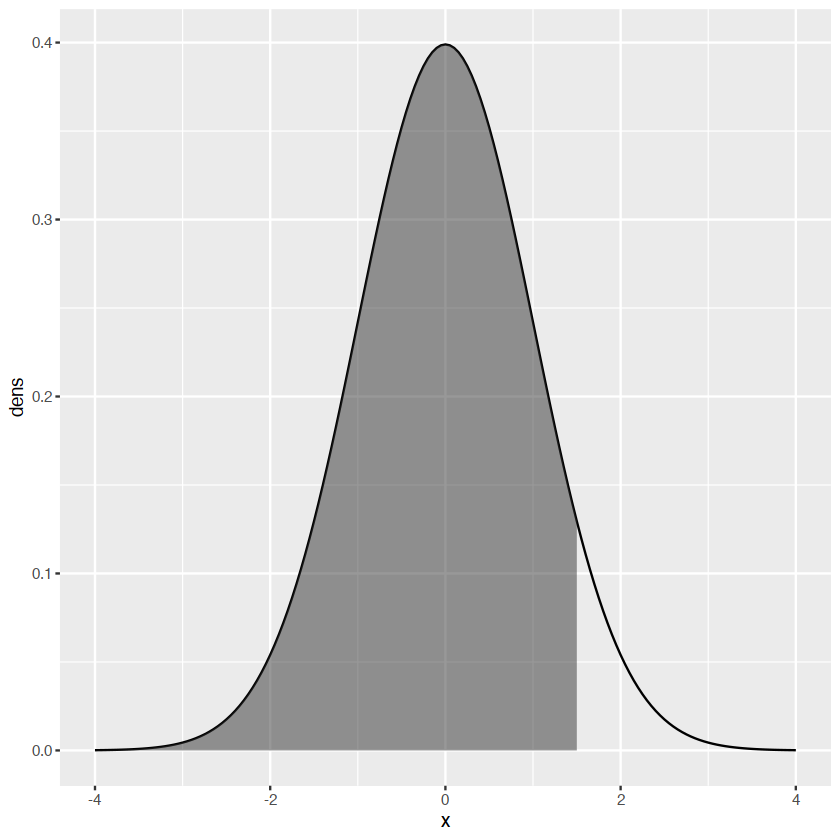

In [4]:
# Plot a standard normal distribution
data <- tibble(x = seq(-4, 4, .05), dens = dnorm(x))
ggplot(data, aes(x = x, y = dens)) + 
    geom_line() +
    geom_area(data = filter(data, x <= 1.5), alpha = .5)

In [5]:
# What is the probability X is less than 1.5?
pnorm(1.5)

# What is the probability X is greater than 0.5? 
1 - pnorm(0.5)

# What is the probability X is less than 1.5 AND greater than 0.5? 
pnorm(1.5) - pnorm(0.5)

# What if the distribution isn't standard normal?
# Calculate Z score first
pnorm((675 - 600) / 50)

# Or provide mean/sd arguments
pnorm(675, mean = 600, sd = 50)


[1] 0.9331928

[1] 0.3085375

[1] 0.2417303

[1] 0.9331928

[1] 0.9331928

## Linearity of Expectations

On Tuesday we showed that expectations are __linear__. What does this mean?

The expectation of a sum is equal to the sum of expectations: $E[X_1 + X_2] = E[X_1] + E[X_2]$. This holds regardless of whether $X_1$ and $X_2$ are independent. For example, let $X_t$ be the amount of rainfall in year $t$. Then the expected amount of rainfall in 2023, 2024, and 2025 altogether is equal to sum of the expectations in each of those years: $E[X_{23} + X_{24} + X_{25}] = E[X_{23}] + E[X_{24}] + E[X_{25}]$.

Suppose $E[X_t] = 600$ for all years. Then $E[X_{23} + X_{24} + X_{25}] = 600 + 600 + 600 = 1800$. So, we would expect 1800mm of rainfall total in those 3 years. This is true even if the amount of rainfall in 2023 affects the amount of rainfall in 2024 and 2025!

# Exercises

## Exercise 1: Wildfire expectations

Suppose the annual probability of a property being affected by a wildfire in California is fixed at 0.0003 (0.03%) and is independent across years.

**a. What is the expected number of fires that property would be affected by in 30 years?**

Hint: Let $X_t$ be a Bernoulli random variable that equals 1 with probability 0.0003 and 0 otherwise. Then the number of fires in 30 years is $Y = X_1 + X_2 + ... + X_{30}$.


#### Your answer here!

##### START

\begin{align*}
E[Y] &= E[X_1 + X_2 + ... + X_{30}] \\
     &= E[X_1] + E[X_2] + ... + E[X_{30}] \\
     &= 30 \times E[X_t] \\
     &= 30 \times 0.0003 \\
     &= 0.009
\end{align*}

We would expect a property to be affected by 0.009 fires in 30 years.

##### END




**b. Suppose the probability of being affected by a fire increases in each year. Can we still calculate the expected number of fires in 30 years by adding the probability of fire in each year?**

#### Your answer here!

##### START

Yes! Instead of multiplying a single probability times the number of years, we would now need to add up 30 different probabilities.

##### END

**c. You consult a wildfire expert and it turns out that after a wildfire impacts a property, it is much less likely that another wildfire will affect that property for the next 5 years. What does that mean about the independence of wildfires over time? Does this impact how we calculate the expectation of the number of wildfires in 30 years?**

#### Your answer here!

##### START

This means that being affected by a wildfire in a given year is dependent on whether your property was affected by a wildfire in another year. Because the expectation of a sum is always exqual to the sum of expectations (linearity of expectations) this doesn't impact how we calculate the expected number of wildfires in 30 years. 

##### END


## Exercise 2: Stock returns and the normal distribution

Imagine that an investor is deciding whether to buy stocks from company A or company B. Historical data indicates that the average annual return of the stocks has been approximately 8% and 6% respectively, and the standard deviation of the returns has been 12% and 7% respectively.

In [6]:
# Setup. Run me!

# Load tidyverse
library(tidyverse)

# Mean of annual return 
mean_return_a <- 0.08
mean_return_b <- 0.06

# Standard deviation of annual return
sd_return_a <- 0.12
sd_return_b <- 0.07

**a. Using simulations, model the stock return of each company next year as a normal distribution using the parameters below. Plot both distributions.**

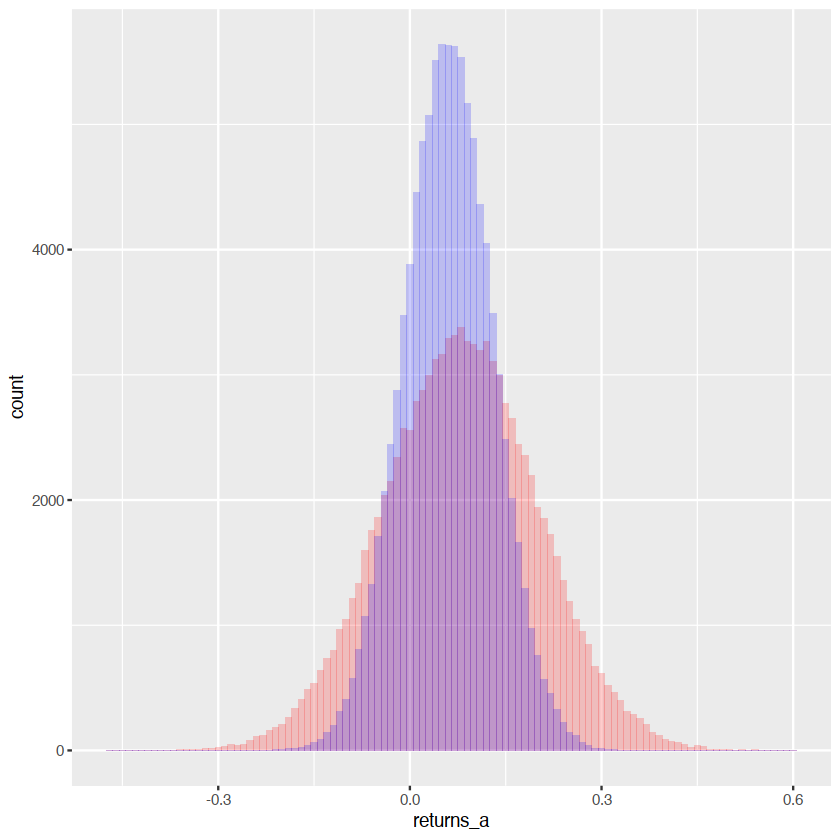

In [7]:
# Your answer here!
set.seed(1)
num_sims <- 1e5

# START

# Simulate returns for each stock 
sims_a <- rnorm(num_sims, mean_return_a, sd_return_a)
sims_b <- rnorm(num_sims, mean_return_b, sd_return_b)

# Put returns into a dataframe
returns_simulation <- tibble(returns_a = sims_a, returns_b = sims_b)

# Plot
ggplot(returns_simulation) +
    geom_histogram(aes(x = returns_a), binwidth=0.01, fill = "red", alpha = 0.2) +
        geom_histogram(aes(x = returns_b), binwidth=0.01, fill = "blue", alpha = 0.2)

# END

**b. Which stock has a higher probability of yielding positive returns next year?**

In [8]:
# Your answer here!

# START

prob_positive_a <- mean(returns_simulation$returns_a > 0)
prob_positive_b <- mean(returns_simulation$returns_b > 0)  

c("Return A Positive" = prob_positive_a, 
  "Return B Positive" = prob_positive_b)

# END

Return A Positive Return B Positive 
          0.74576           0.80462

**c. After a positive year for both companies, stock's A return was 10% and stock's B was 9%. Calculate the z-score and discuss which stock performed better relative to past years.**

In [9]:
# Your answer here!

# START

z_score_a <- (0.1 - mean_return_a) / sd_return_a
z_score_b <- (0.09 - mean_return_b) / sd_return_b

c(z_score_a, z_score_b)

# END

[1] 0.1666667 0.4285714

**d. Suppose that the investor decides to buy stock from company B. Out of the next 10 years, how many years should they expect to receive positive returns on average?**

#### Your answer here!

##### START

Let $X_t$ be a Bernoulli random variable that equals 1 if the stock yields positive returns in year $t$ and 0 otherwise. Then the total number of years with positive returns is $Y = X_1 + X_2 + ... + X_{10}$. Given the probability you calculated in b is approximately 0.805, $E[Y] = E[X_1 + X_2 + ... + X_{10}]$. Because of the linearity of expectations, $E[Y] = E[X_1] + E[X_2] + ... + E[X_{10}]$. This simplifies to $E[Y] = 10 E[X_t] = 10 Pr(X_t = 1) = 8.05$.

##### END

## Exercise 3: Insuring for rainfall

Suppose a risk-neutral farmer is considering insuring against rainfall conditions. Rainfall is normally distributed with mean 600mm and standard deviation 50mm. If rainfall is less than 500mm or greater than 700mm, the farmer's crop will fail.

**a. What is the probability the farmer's crop will fail?**

Hint: Approximately 95% of the area under the normal distribution curve falls within 2 standard deviations of the mean.

#### Your answer here!

##### START

The crop will fail if rainfall is less than 500mm or greater than 700mm. The Z-score of 500mm is $\frac{500 - 600}{50}=-2$ and the Z-score of 700mm is $\frac{700 - 600}{50}=2$, so 95% of outcomes will fall between the points of failure. Thus the probability of crop failure is $1 - 0.95 = 0.05$.

##### END

**b. Now suppose the cost of crop failure is \\$2 million. Insurance costs \\$150,000 to buy. If crops fail, the farmer is reimbursed the entire cost of crop failure. Draw out a decision tree. Should she buy insurance?**

#### Your answer here!

##### START

![](decision_tree.png)

She should not buy insurance. 

The expected cost of insurance is \\$150,000 because she pays that much whether crops fail or not. The expected cost of uninsurance is $\$2,000,000 \times \Pr(Fail) = \$100,000$. The expected cost of insurance is higher than uninsurance, so on average, she will incur less cost by remaining unisured.

##### END

**c. Above what probability should the farmer buy insurance?**

#### Your answer here!
##### START
Buy if and only if the cost of insurance is _less_ than the expected cost of uninsurance: $150,000 < 2,000,000 \times p$.

Solve for p, then  $p > \frac{150,000}{2,000,000} = 0.075$.
##### END